#install BBOX-Label_Tool.
pip install pillow
git clone https://github.com/enriqueav/BBox-Label-Tool.git
cd BBox-Label-Tool

In [1]:
!pip install pydicom

     |████████████████████████████████| 7.1MB 4.1MB/s 


In [0]:
import math
import os
import shutil
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pydicom
import cv2
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%matplotlib inline
import os
os.chdir('/content/drive/My Drive/GL_Capstone/darkflow/')

options = {"model": "cfg/tiny-yolo-rsna.cfg", 
           "load": "bin/yolov2-tiny.weights",
           "batch": 8,
           "epoch": 100,
           "train": True,
           "annotation": "./annotations/",
           "dataset": "./images/"}

In [0]:
from darkflow.net.build import TFNet

In [0]:
options = {"model": "cfg/yolov2-rsna.cfg", 
           "load": "bin/yolov2.weights",
           "batch": 5,
           "epoch": 5,
           "train": True,
           "gpu": 1.0,
           "annotation": "train_annotations/",
           "dataset": "train_images/"}

In [0]:
#checksnet pneumonia detection-  checknet weights, bottleneck features, apply softmax for three calsses of prediction

In [8]:
%ls

annotations/  ckpt/      labels.txt   setup.py             Yolo_v2_colab.ipynb
bin/          darkflow/  LICENSE      test/
build/        demo.gif   preview.png  train_annotations/
built_graph/  flow       README.md    train_images/
cfg/          images/    sample_img/  Yolo_v1_colab.ipynb


In [10]:
tfnet = TFNet(options)

Parsing ./cfg/yolov2.cfg
Parsing cfg/yolov2-rsna.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.06031966209411621s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | 

In [11]:
tfnet.train()


cfg/yolov2-rsna.cfg parsing train_annotations/
Parsing for ['pneumonia'] 
[====================>]100%  074640970781463290ee39b0e53cd72c.xml
Statistics:
pneumonia: 376
Dataset size: 228
Dataset of 228 instance(s)
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 5
	Epoch number  : 5
	Backup every  : 2000
step 1 - loss 233.54263305664062 - moving ave loss 233.54263305664062
step 2 - loss 232.34280395507812 - moving ave loss 233.4226501464844
step 3 - loss 230.5913848876953 - moving ave loss 233.13952362060547
step 4 - loss 228.57144165039062 - moving ave loss 232.682715423584
step 5 - loss 227.41586303710938 - moving ave loss 232.15603018493653
step 6 - loss 225.94467163085938 - moving ave loss 231.5348943295288
step 7 - loss 225.11074829101562 - moving ave loss 230.8924797256775
step 8 - loss 224.59671020507812 - moving ave loss 230.26290277361758
step 9 - loss 222.6552276611328 - moving ave loss 229.5021352623691
step 10 - loss 222.193115234375 - moving ave loss 228.771233

In [0]:
tfnet.savepb()

In [0]:
# load the model from the disk

In [0]:
# load a test image

In [13]:
# make a prediction for a sample image
import pprint as pp

original_img = cv2.imread("sample_img/0914700939a9497aac10a07cf7126d58.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(original_img)
print(results)

[{'label': 'pneumonia', 'confidence': 0.63479763, 'topleft': {'x': 290, 'y': 935}, 'bottomright': {'x': 301, 'y': 951}}, {'label': 'pneumonia', 'confidence': 0.0, 'topleft': {'x': 196, 'y': 775}, 'bottomright': {'x': 377, 'y': 1023}}, {'label': 'pneumonia', 'confidence': 0.67908365, 'topleft': {'x': 341, 'y': 935}, 'bottomright': {'x': 353, 'y': 951}}, {'label': 'pneumonia', 'confidence': 0.64474326, 'topleft': {'x': 320, 'y': 850}, 'bottomright': {'x': 378, 'y': 1014}}, {'label': 'pneumonia', 'confidence': 0.0, 'topleft': {'x': 258, 'y': 767}, 'bottomright': {'x': 422, 'y': 1023}}, {'label': 'pneumonia', 'confidence': 0.65243703, 'topleft': {'x': 395, 'y': 934}, 'bottomright': {'x': 407, 'y': 951}}, {'label': 'pneumonia', 'confidence': 0.63388765, 'topleft': {'x': 372, 'y': 847}, 'bottomright': {'x': 436, 'y': 1018}}, {'label': 'pneumonia', 'confidence': 0.617207, 'topleft': {'x': 211, 'y': 930}, 'bottomright': {'x': 279, 'y': 1023}}, {'label': 'pneumonia', 'confidence': 0.0, 'topleft

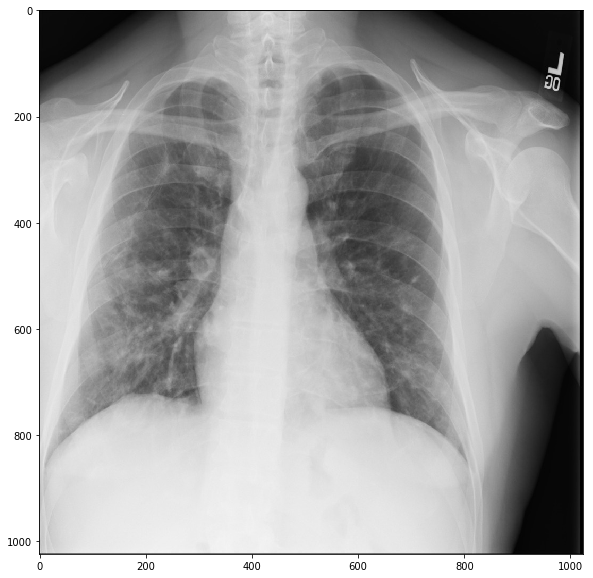

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(original_img)


In [0]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.5:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

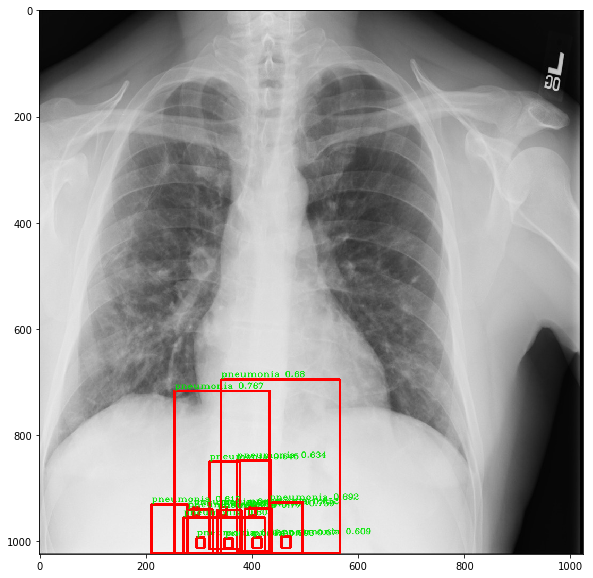

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(boxing(original_img, results))